In [43]:
import prepare_data

id2label, label2id, submission_file, test_ids_final, test_ocr_clean, train_ids_final, train_labels_final, train_set_ocr = prepare_data.read_files()

In [2]:
# Goal: dict = {'file_name.jpg':('text',label_id)}

def transform_image_names(image_label_dict, sep='\\'):

    new_dict = {key.split(sep)[-1]: value for key, value in image_label_dict.items()}

    return new_dict

In [3]:
train_image_text_dict = transform_image_names(train_set_ocr)
train_image_label_dict = transform_image_names(train_labels_final)
test_image_text_dict = transform_image_names(test_ocr_clean, sep='/')

In [4]:
import numpy as np

# Liczba odczytanych plików przez ING
len(np.unique(np.array(list(train_image_text_dict.keys()))))

10884

In [5]:
# Liczba sklasyfikowanych plików przez ING
len(np.unique(np.array(list(train_image_label_dict.keys()))))

10849

In [6]:
test_image_text_dict.keys()

dict_keys(['e9fdc30e-99bd-4df8-ac68-adab008dfc88.jpg', '1131d492-9670-4cf3-876b-d7d63fdb93cf.jpg', 'a10b2b27-b827-417c-8158-87c607516275.jpg', 'f72c1791-2966-4751-885a-f8575b529811.jpg', '3acc02fa-164e-43d2-899a-82f16ef56dd8.jpg', '5976f2ff-8d3d-472b-baef-359d9eec7a3f.jpg', 'c415a5a2-1aea-4d80-8816-f5124bb7ee09.jpg', '6ccf986d-22fe-4e6e-a0b0-183fbe518667.jpg', '2b240f3e-6500-497a-83ec-257d1216121e.jpg', 'e7783235-6c19-4ae5-9ec8-73c0386e15b9.jpg', '82d42576-7d86-462f-9436-17ddb6cfe616.jpg', '7f1db6f1-1d47-4fec-a01d-e4f7b7c7012f.jpg', 'c324f26e-00ee-45ba-b0e5-764614ee4101.jpg', '0e98f8d2-38fe-4415-9867-ce9ae95288e8.jpg', 'b0529595-49c5-4e44-803e-37a48cd23073.jpg', 'dea42d23-9652-41d3-8e91-7d54c8289809.jpg', 'b8f3430b-dbb9-4488-903c-527a169f738e.jpg', '8094be1e-2327-42a0-8f90-cf9aa9ed0ff2.jpg', '030c9a46-462f-4e8b-a5dc-e6c3c922961d.jpg', 'e9d0cbe9-5d5d-4007-82c0-c09308e0e080.jpg', 'b1c6a6d4-065d-4c40-b6ac-5a1bc776ea1f.jpg', '549c3f37-6ed8-4bee-b946-6f3f1cffee31.jpg', 'f72d4660-4141-4226-a

In [5]:
def create_final_dict(image_text_dict, image_label_dict, id2label):

    result_dict = {}

    for file_name in image_text_dict:
        if file_name in train_image_label_dict:
            text = image_text_dict[file_name]
            label = image_label_dict[file_name]
            label_id = id2label[label]
            result_dict[file_name] = (text, label_id)

    return result_dict

In [6]:
train_final_dict = create_final_dict(train_image_text_dict, train_image_label_dict, id2label)
#train_final_dict

In [9]:
train_final_dict['106b1d89-3ef5-4760-97cd-50d0efbf45a5.jpg'][1]

10

In [10]:
import pandas as pd
len(pd.read_pickle('photos_dict_less30_train.pickle')) + len(pd.read_pickle('photos_dict_moreeq30_train.pickle'))

10850

In [11]:
# Mamy o jeden odczyt więcej niż ING

temp = pd.read_pickle('photos_dict_less30_train.pickle')
print(len(temp['f14ea197-70bd-45ae-9a22-d243f37f6c26'][0]))
print(len(train_final_dict['f14ea197-70bd-45ae-9a22-d243f37f6c26.jpg'][0]))

3136
2924


In [8]:
import pandas as pd
photos_dict_less30_train = pd.read_pickle('photos_dict_less30_train_rot.pickle')
photos_dict_moreeq30_train = pd.read_pickle('photos_dict_moreeq30_train_rot.pickle')


In [9]:
len(photos_dict_less30_train.keys())

10742

In [10]:
len(photos_dict_moreeq30_train)

108

In [11]:
photos_all = photos_dict_less30_train.copy() 
photos_all.update(photos_dict_moreeq30_train)


In [16]:
len(photos_all.keys())

10850

In [17]:
photos_all['0025418f-0afe-458e-bb61-aa26fbcb2cf9'][0]

'OZ R AA © PITaxpl san.ksxewiee nA pooań,PaLAciemEWYestniA URZĄD WPELNIĆ UŻY ORUKOWANYM UITERAMI,CZARNYK LUD NIEBIESKIM KOLOREM. Żatwe pędzi sdi wwerjernienj wpoc zk gor pi rióeniyfkatot podatkowy NIP TRU PESEL WZZREEEWEEJ POETKA EURO Sata 9.2.4 5 2 6,0 8 7 2 8591838364 094075618h Z Taemifatogodikowy MI yar PESEL EA małż eeęg 0 8 9-5 1 5 3 7 Prawidłowa wypałienteTrmioarzo wst wezoZJEEGZapGZNARIO A bróGzu TefornCyf POSĄG W UzĘGIER, PIT-37 Ę ZEZNANIE O WYSOKOŚCI OSIĄGNIĘTEGO DOCHODU (PONIESIONEJ STRATY) Rak w roku podatkowym 2021 Formularz przeznaczony Jet la podatników, którzy w roku podatkowym: uzyska przychody ze red położonych na terytonam Rzeczypospaliej Poke (polegające opodatkowaniu na ogólnych zasadach przy zastosowaniu skan podnikowej) wyłącznie za pośradnictwem płalników lub Innych podmiotów obowiqzanych do sparządzenia Imlonnej informacji o wysokości tych dachodów (przychodów), te prowadzi pozaronicze dzlaośi gospodzrcze oraz dk apocalnch produk rolno opodatkowanych wa ogólnyc

In [18]:
sorted(photos_all.keys())

['0001ea99-0c87-4ed7-b658-fecb779186ef',
 '00133f89-017d-44f5-a549-e11cf5b5221a',
 '0016b62a-bec9-45e1-b49b-aa76ed28b24c',
 '0025418f-0afe-458e-bb61-aa26fbcb2cf9',
 '002604f4-259f-44d3-bd0c-37ea1ead946f',
 '002ca5b9-1d65-4748-a619-f0b7406e0741',
 '002dbe76-e499-4b44-b2f4-c9d039592984',
 '002e7e22-048e-4cf8-be5a-d3789d656b35',
 '003a221a-1383-4695-ad08-87c9ee201f0d',
 '003a526b-7082-4673-b87f-7229853e2f5d',
 '00441da6-0614-442f-b754-6028d47dd2b8',
 '0049bd7c-6d39-48bd-8069-431533dae9bd',
 '0059d81f-65ca-43f4-9842-4c1ad34e7481',
 '005b8895-6f45-4ee4-9bbb-ccb6173ab7cb',
 '005c1334-2d06-4965-a274-32017b1d113e',
 '0064d0a7-dba8-46c6-a57d-241f3b154e19',
 '006a9965-f58a-4a33-bd85-beab002f7e4c',
 '0071d20d-d733-479c-9f94-4a3ad0aee70b',
 '007b4213-95c1-4a24-91dc-0d6bf521ff64',
 '007c98ec-9955-497f-8e74-2e7d85d75bf6',
 '008329b6-31cc-4829-8706-606b1d26c57e',
 '0090043f-095f-4680-99be-a1456cd32834',
 '0099ed1d-42a6-4dc7-ac97-fe3bb86e3370',
 '009aa99b-82f2-42c8-94b0-142fedb73466',
 '009b7ddb-0578-

In [12]:

modified_dict = {}

# Iterate over the keys in the original dictionary
for key in train_final_dict.keys():
    modified_key = key.split("/")[-1]
    #print(key)
    modified_key = modified_key.split('.')[0]  # Remove the last three characters from the key
   # print(modified_key)
    # if photos_all.get(modified_key, 0)==0:
    #     print(modified_key)
    value = train_final_dict[key] 
    modified_dict[modified_key] = value  # Update the modified dictionary


In [13]:
len(modified_dict.keys())

10849

In [24]:
len(modified_dict.keys())

10849

In [14]:
# Create DataFrame
keys = pd.Series(modified_dict.keys())
values = pd.Series( modified_dict.values())
values_text = values.apply(lambda x: x[0])
values_id = values.apply(lambda x: x[1])


df = pd.DataFrame({'File':keys,'Text ING':values_text,'ID':values_id})

keys = pd.Series(photos_all.keys())
values = pd.Series(photos_all.values())
values_text = values.apply(lambda x: x[0])
values_nrow = values.apply(lambda x: x[1])


df1 = pd.DataFrame({'File':keys,'Text Adam':values_text,'Nrow':values_nrow})

df2 = df.merge(df1,on='File')
df2

,File,Text ING,ID,Text Adam,Nrow
0,9d6f61c6-52ad-4546-85b7-b6a0a30a21d5,"POLA Lalwe poda PODATNIK POLA , CIEMNE _ URZAD...",10,"(V PiTax.pl POLA JASNE V/YPEŁKIA PODATNIK, POŁ...",48
1,f14ea197-70bd-45ae-9a22-d243f37f6c26,PlTaxpl POUA 'WYPELNIA PODATNIK POLA CIEMNE WY...,10,POJETEJ EPEE W O W W) PiTaypl POLA JASNE WYPEL...,47
2,070a521a-7038-4551-bc6a-bbb6f96e1505,MyPfenl Wypelnic DulyMi DaukowanlUiTERAM ClRnY...,10,p PITaxpl so snewrrttna robamik Po CIEMNE WYPE...,38
3,f4d15b30-6e96-4452-b614-a986065d6a80,PlTaxpl POLA JASNE WYPEŁNIA PODATNIK _POLA CIE...,10,+ (Gy PITax.pl. żpou yeżwe wypctnia robwrać po...,55
4,64d085a8-39a0-4887-859e-811a3de9879b,PITaxpl LA Jash€ WyPelNIA PODiTŃIK PCU CieMne ...,10,"(GF PITaż pi. ojej wod ok ny aaa ya zickądka,„...",48
...,...,...,...,...,...
10844,8a1bb716-156c-4eca-a8cd-f726a5cf7032,"MSDS 002z4 Ello ~arte-Vewaa @WEre Hkc hm2 ""7c0...",17,4 3 san ky SA MSDS ję oazz% Ą 27 = datdasegonn...,33
10845,e42169d6-f1c4-416a-a7eb-4fc90fd3c086,"June 1992 40 03-540 Appearance: Colorless, cle...",17,4 June 1992 AR-304 03-540 - Appearance: Colori...,32
10846,9807fe93-30d5-422b-8844-fd16529c8e7d,PULL MAILFILE REQUEST TO: Bagby RJR-10301 July...,4,"a, RtR=+R+>,> zn © PULL MAILFILE REQUEST TO: J...",26
10847,e7eac2d5-364d-4f82-bb9d-354f11159a51,~Tclecen 8/23/38 SAJ Co z & RH cam bt meaured ...,5,"j TTelecn 4/a3/88 Mopsy JAJ CO, ÓC RA cam ta ...",17


In [15]:
ad = df2['Text Adam'].apply(lambda x: len(x))
ing = df2['Text ING'].apply(lambda x: len(x))

(ad>ing).sum()



7623

In [16]:
polish_dict={"ą":"a", "ę":"e", "ć":"c", "ś":"s", "ż":"z", "ź":"z", "ó":"o","ł":"l","Ą":"A", "Ę":"E","Ć":"C","Ś":"S","Ż":"Z","Ź":"Z","Ó":"O","Ł":"L"}

df2['Text Adam pl'] = df2['Text Adam']

for key in polish_dict:
    df2['Text Adam pl'] = df2['Text Adam pl'].apply(lambda x: x.replace(key, polish_dict[key]))
df2

,File,Text ING,ID,Text Adam,Nrow,Text Adam pl
0,9d6f61c6-52ad-4546-85b7-b6a0a30a21d5,"POLA Lalwe poda PODATNIK POLA , CIEMNE _ URZAD...",10,"(V PiTax.pl POLA JASNE V/YPEŁKIA PODATNIK, POŁ...",48,"(V PiTax.pl POLA JASNE V/YPELKIA PODATNIK, POL..."
1,f14ea197-70bd-45ae-9a22-d243f37f6c26,PlTaxpl POUA 'WYPELNIA PODATNIK POLA CIEMNE WY...,10,POJETEJ EPEE W O W W) PiTaypl POLA JASNE WYPEL...,47,POJETEJ EPEE W O W W) PiTaypl POLA JASNE WYPEL...
2,070a521a-7038-4551-bc6a-bbb6f96e1505,MyPfenl Wypelnic DulyMi DaukowanlUiTERAM ClRnY...,10,p PITaxpl so snewrrttna robamik Po CIEMNE WYPE...,38,p PITaxpl so snewrrttna robamik Po CIEMNE WYPE...
3,f4d15b30-6e96-4452-b614-a986065d6a80,PlTaxpl POLA JASNE WYPEŁNIA PODATNIK _POLA CIE...,10,+ (Gy PITax.pl. żpou yeżwe wypctnia robwrać po...,55,+ (Gy PITax.pl. zpou yezwe wypctnia robwrac po...
4,64d085a8-39a0-4887-859e-811a3de9879b,PITaxpl LA Jash€ WyPelNIA PODiTŃIK PCU CieMne ...,10,"(GF PITaż pi. ojej wod ok ny aaa ya zickądka,„...",48,"(GF PITaz pi. ojej wod ok ny aaa ya zickadka,„..."
...,...,...,...,...,...,...
10844,8a1bb716-156c-4eca-a8cd-f726a5cf7032,"MSDS 002z4 Ello ~arte-Vewaa @WEre Hkc hm2 ""7c0...",17,4 3 san ky SA MSDS ję oazz% Ą 27 = datdasegonn...,33,4 3 san ky SA MSDS je oazz% A 27 = datdasegonn...
10845,e42169d6-f1c4-416a-a7eb-4fc90fd3c086,"June 1992 40 03-540 Appearance: Colorless, cle...",17,4 June 1992 AR-304 03-540 - Appearance: Colori...,32,4 June 1992 AR-304 03-540 - Appearance: Colori...
10846,9807fe93-30d5-422b-8844-fd16529c8e7d,PULL MAILFILE REQUEST TO: Bagby RJR-10301 July...,4,"a, RtR=+R+>,> zn © PULL MAILFILE REQUEST TO: J...",26,"a, RtR=+R+>,> zn © PULL MAILFILE REQUEST TO: J..."
10847,e7eac2d5-364d-4f82-bb9d-354f11159a51,~Tclecen 8/23/38 SAJ Co z & RH cam bt meaured ...,5,"j TTelecn 4/a3/88 Mopsy JAJ CO, ÓC RA cam ta ...",17,"j TTelecn 4/a3/88 Mopsy JAJ CO, OC RA cam ta ..."


In [59]:
text_category = dict(zip(merged_data['Text Adam pl'], merged_data['ID']))
text_category

{'PEEP O NN © PITaxpl rot asxewreuta Poownx Pot cieknie wyPLNU URZAG WYPELNI DUZY, DRUKOWANA LITERA, CZARNYM LYS RIEDIESKCH KOLONIE. PEAK Error (eezoszni jeg. DRSRIRZACRORZASNE ST 6933067816 9362380585 "Prawialowa wypelniania formularza uatwi wczelniejaza zapoznania sf z broszur Iaformacyjna dostepna w urzeduch PIT-37 » ZEZNANIE O WYSOKOSCI OSIAGNIETEGO DOCHODU (PONIESIONEJ STRATY) = Formula przeznaczony [st la podatnikow, ry w oku podali S$ przystaje od petorycna bye Rczyowyi Fakt (podegjao opatka na oybych zasadach pz aiotonacu tai ponow lac z penttnpa rawa ka paznikw oowiayc sra nierejloj wok trb Gckaow) af praepiecaraj ik podrapany pkp oplywa 3) ia sa obowiazani doliczac do uzyskanych dochodow dochodow malalatnich dzieci, Ans slazaa dekedaw oseayzla ci, SD odlane god pozowego. Podstwa prawna: FAL Stus ustawy zr 2 io 181 1. pot dohodowy moda feycznyh (Dz U: 2021 r. poz 1128, pozn zm zwanej dk] towa”. *Femin skladania: Oddala tSlutogo do dnia 3 kwiatnia roku nosepujacogo po roku poda

In [60]:
polish_texts, english_texts, other_texts = create_language_dicts(text_category)

In [61]:
polish_texts

{0: 152,
 1: 103,
 2: 7,
 3: 138,
 4: 47,
 5: 242,
 6: 144,
 7: 22,
 8: 27,
 9: 99,
 10: 400,
 11: 295,
 12: 73,
 13: 66,
 14: 9,
 15: 42,
 16: 47,
 17: 57,
 18: 390,
 19: 373,
 20: 376}

In [62]:
english_texts

{0: 310,
 1: 311,
 2: 522,
 3: 52,
 4: 448,
 5: 198,
 6: 332,
 7: 504,
 8: 519,
 9: 361,
 10: 0,
 11: 0,
 12: 378,
 13: 448,
 14: 551,
 15: 505,
 16: 444,
 17: 437,
 18: 0,
 19: 0,
 20: 0}

In [63]:
other_texts

{0: 98,
 1: 140,
 2: 32,
 3: 340,
 4: 70,
 5: 149,
 6: 76,
 7: 23,
 8: 9,
 9: 34,
 10: 0,
 11: 0,
 12: 138,
 13: 37,
 14: 3,
 15: 23,
 16: 88,
 17: 35,
 18: 0,
 19: 0,
 20: 1}

In [19]:
import tqdm

In [18]:
import tqdm
from langdetect import detect
import numpy as np

In [20]:

def create_language_dicts(text_category_dictionary):
    categories = np.unique(list(text_category_dictionary.values()))
    polish_texts  = {categories: 0 for categories in categories}
    english_texts = {categories: 0 for categories in categories}
    other_texts = {categories: 0 for categories in categories}

    for key in text_category_dictionary.keys():
        try:
            language = detect(key)
            value = text_category_dictionary[key]
            if language == 'pl':
                polish_texts[value] += 1
            elif language == 'en':
                english_texts[value] += 1
            else:
                other_texts[value] += 1
        except:
            continue
    return polish_texts, english_texts, other_texts

In [30]:
df2

,File,Text ING,ID,Text Adam,Nrow,Text Adam pl
0,9d6f61c6-52ad-4546-85b7-b6a0a30a21d5,"POLA Lalwe poda PODATNIK POLA , CIEMNE _ URZAD...",10,(U PiTay.pl OLAJAGNE WYPEŁNIA PODAT POŁA CIE P...,46,(U PiTay.pl OLAJAGNE WYPELNIA PODAT POLA CIE P...
1,f14ea197-70bd-45ae-9a22-d243f37f6c26,PlTaxpl POUA 'WYPELNIA PODATNIK POLA CIEMNE WY...,10,Pe ZPCCZE TW EE TRZPIENIOWE OE CCK OP CRPOWKYJ...,48,Pe ZPCCZE TW EE TRZPIENIOWE OE CCK OP CRPOWKYJ...
2,070a521a-7038-4551-bc6a-bbb6f96e1505,MyPfenl Wypelnic DulyMi DaukowanlUiTERAM ClRnY...,10,EEEE EEEE GU PITax-pl_ rot snsnewcwnn posnx.Po...,57,EEEE EEEE GU PITax-pl_ rot snsnewcwnn posnx.Po...
3,f4d15b30-6e96-4452-b614-a986065d6a80,PlTaxpl POLA JASNE WYPEŁNIA PODATNIK _POLA CIE...,10,+ 6. PITaxcpl śro ówe wypeia ronwrak Poi ciaić...,59,+ 6. PITaxcpl sro owe wypeia ronwrak Poi ciaic...
4,64d085a8-39a0-4887-859e-811a3de9879b,PITaxpl LA Jash€ WyPelNIA PODiTŃIK PCU CieMne ...,10,: © Pasz saw rondo ao oczka s R |--ERA [WONNA ...,46,: © Pasz saw rondo ao oczka s R |--ERA [WONNA ...
...,...,...,...,...,...,...
10844,8a1bb716-156c-4eca-a8cd-f726a5cf7032,"MSDS 002z4 Ello ~arte-Vewaa @WEre Hkc hm2 ""7c0...",17,a > san ky * PSREA MSDS s OaZZA p. M ducdoreyo...,32,a > san ky * PSREA MSDS s OaZZA p. M ducdoreyo...
10845,e42169d6-f1c4-416a-a7eb-4fc90fd3c086,"June 1992 40 03-540 Appearance: Colorless, cle...",17,4 lune 1992 AR-304 03-540 - Appearance; Colorl...,32,4 lune 1992 AR-304 03-540 - Appearance; Colorl...
10846,9807fe93-30d5-422b-8844-fd16529c8e7d,PULL MAILFILE REQUEST TO: Bagby RJR-10301 July...,4,yy (O) PULL MAILFILE REQUEST TO: Joyce Bagby =...,26,yy (O) PULL MAILFILE REQUEST TO: Joyce Bagby =...
10847,e7eac2d5-364d-4f82-bb9d-354f11159a51,~Tclecen 8/23/38 SAJ Co z & RH cam bt meaured ...,5,MEEN ENENNNNNNENNE i Telecom 4/asf88 Mopsy JAJ...,19,MEEN ENENNNNNNENNE i Telecom 4/asf88 Mopsy JAJ...


In [33]:

dict_ing = dict(zip(df2['ID'],df2['Text ING'] ))
dict_adam = dict(zip(df2['Text Adam pl'], df2['ID']))


categories = np.unique(df2['ID'])
polish_texts  = {categories: 0 for categories in categories}
english_texts = {categories: 0 for categories in categories}
other_texts = {categories: 0 for categories in categories}

for index, row in df2.iterrows():
    try:
        language_ing = detect(row['Text ING'])
        language_adam = detect(row['Text Adam pl'])
        value = row['ID']
        if language_ing == 'pl' and language_adam == 'pl':
            polish_texts[value] += 1
        elif language_ing == 'en' or language_adam == 'en':
            english_texts[value] += 1
        else:
            other_texts[value] += 1
    except:
        continue
polish_texts, english_texts, other_texts



({0: 4,
  1: 5,
  2: 0,
  3: 2,
  4: 1,
  5: 3,
  6: 6,
  7: 0,
  8: 0,
  9: 6,
  10: 400,
  11: 295,
  12: 1,
  13: 0,
  14: 0,
  15: 0,
  16: 3,
  17: 1,
  18: 390,
  19: 373,
  20: 376},
 {0: 456,
  1: 422,
  2: 548,
  3: 68,
  4: 495,
  5: 431,
  6: 454,
  7: 524,
  8: 545,
  9: 436,
  10: 0,
  11: 0,
  12: 419,
  13: 512,
  14: 560,
  15: 553,
  16: 501,
  17: 510,
  18: 0,
  19: 0,
  20: 0},
 {0: 104,
  1: 123,
  2: 13,
  3: 220,
  4: 65,
  5: 161,
  6: 91,
  7: 21,
  8: 11,
  9: 56,
  10: 0,
  11: 0,
  12: 157,
  13: 38,
  14: 4,
  15: 18,
  16: 74,
  17: 17,
  18: 0,
  19: 0,
  20: 1})

In [34]:
polish_texts

{0: 4,
 1: 5,
 2: 0,
 3: 2,
 4: 1,
 5: 3,
 6: 6,
 7: 0,
 8: 0,
 9: 6,
 10: 400,
 11: 295,
 12: 1,
 13: 0,
 14: 0,
 15: 0,
 16: 3,
 17: 1,
 18: 390,
 19: 373,
 20: 376}

In [43]:
categories = np.unique(df2['ID'])
df2['isPolish'] = 0
df2['isEnglish'] = 0
df2['isOther'] = 0

for index, row in df2.iterrows():
    try:
        language_ing = detect(row['Text ING'])
        language_adam = detect(row['Text Adam pl'])
        value = row['ID']
        if language_ing == 'pl' and language_adam == 'pl':
            df2.at[row,'isPolish'] = 1
        elif language_ing == 'en' or language_adam == 'en':
            df2.at[row,'isEnglish'] = 1
        else:
            df2.at[row, 'isOther'] = 1
    except:
        continue
df2


,File,Text ING,ID,Text Adam,Nrow,Text Adam pl,isPolish,isEnglish,isOther
0,9d6f61c6-52ad-4546-85b7-b6a0a30a21d5,"POLA Lalwe poda PODATNIK POLA , CIEMNE _ URZAD...",10,(U PiTay.pl OLAJAGNE WYPEŁNIA PODAT POŁA CIE P...,46,(U PiTay.pl OLAJAGNE WYPELNIA PODAT POLA CIE P...,0,0,0
1,f14ea197-70bd-45ae-9a22-d243f37f6c26,PlTaxpl POUA 'WYPELNIA PODATNIK POLA CIEMNE WY...,10,Pe ZPCCZE TW EE TRZPIENIOWE OE CCK OP CRPOWKYJ...,48,Pe ZPCCZE TW EE TRZPIENIOWE OE CCK OP CRPOWKYJ...,0,0,0
2,070a521a-7038-4551-bc6a-bbb6f96e1505,MyPfenl Wypelnic DulyMi DaukowanlUiTERAM ClRnY...,10,EEEE EEEE GU PITax-pl_ rot snsnewcwnn posnx.Po...,57,EEEE EEEE GU PITax-pl_ rot snsnewcwnn posnx.Po...,0,0,0
3,f4d15b30-6e96-4452-b614-a986065d6a80,PlTaxpl POLA JASNE WYPEŁNIA PODATNIK _POLA CIE...,10,+ 6. PITaxcpl śro ówe wypeia ronwrak Poi ciaić...,59,+ 6. PITaxcpl sro owe wypeia ronwrak Poi ciaic...,0,0,0
4,64d085a8-39a0-4887-859e-811a3de9879b,PITaxpl LA Jash€ WyPelNIA PODiTŃIK PCU CieMne ...,10,: © Pasz saw rondo ao oczka s R |--ERA [WONNA ...,46,: © Pasz saw rondo ao oczka s R |--ERA [WONNA ...,0,0,0
...,...,...,...,...,...,...,...,...,...
10844,8a1bb716-156c-4eca-a8cd-f726a5cf7032,"MSDS 002z4 Ello ~arte-Vewaa @WEre Hkc hm2 ""7c0...",17,a > san ky * PSREA MSDS s OaZZA p. M ducdoreyo...,32,a > san ky * PSREA MSDS s OaZZA p. M ducdoreyo...,0,0,0
10845,e42169d6-f1c4-416a-a7eb-4fc90fd3c086,"June 1992 40 03-540 Appearance: Colorless, cle...",17,4 lune 1992 AR-304 03-540 - Appearance; Colorl...,32,4 lune 1992 AR-304 03-540 - Appearance; Colorl...,0,0,0
10846,9807fe93-30d5-422b-8844-fd16529c8e7d,PULL MAILFILE REQUEST TO: Bagby RJR-10301 July...,4,yy (O) PULL MAILFILE REQUEST TO: Joyce Bagby =...,26,yy (O) PULL MAILFILE REQUEST TO: Joyce Bagby =...,0,0,0
10847,e7eac2d5-364d-4f82-bb9d-354f11159a51,~Tclecen 8/23/38 SAJ Co z & RH cam bt meaured ...,5,MEEN ENENNNNNNENNE i Telecom 4/asf88 Mopsy JAJ...,19,MEEN ENENNNNNNENNE i Telecom 4/asf88 Mopsy JAJ...,0,0,0


In [30]:
from sklearn.model_selection import train_test_split

categories = df2['ID'].unique()

train_data = pd.DataFrame()
test_data = pd.DataFrame()

for category in categories:
    # Filter the DataFrame for the current category
    category_data = df2[df2['ID'] == category]
    
    # Perform train-test split for the current category
    train_category, test_category = train_test_split(category_data, test_size=0.1)
    
    # Append the split data to the respective train and test DataFrames
    train_data = pd.concat([train_data, train_category])
    test_data = pd.concat([test_data, test_category])

print("Train data:")
print(train_data.shape)
print("\nTest data:")
print(test_data.shape)

Train data:
(9755, 9)

Test data:
(1094, 9)


In [28]:
# Requires columns: ID - category, Text ING - text from ING, Text Adam pl - text from Adam without polish letters
def detect_polish_from_df(df2):

    df2['isPolish'] = 0
    df2['isEnglish'] = 0
    df2['isOther'] = 0

    for index, row in df2.iterrows():
        try:
            language_ing = detect(row['Text ING'])
            language_adam = detect(row['Text Adam pl'])
            if language_ing == 'pl' and language_adam == 'pl':
                df2.at[index,'isPolish'] = 1
            elif language_ing == 'en' or language_adam == 'en':
                df2.at[index,'isEnglish'] = 1
            else:
                df2.at[index,'isOther'] = 1
        except:
            continue
    return df2

In [31]:
train_data = detect_polish_from_df(train_data)
test_data = detect_polish_from_df(test_data)

In [47]:
df2[df2['isPolish']==1]

,File,Text ING,ID,Text Adam,Nrow,Text Adam pl,isPolish,isEnglish,isOther


In [32]:
train_data = pd.read_csv('train_data_v2.csv')
test_data = pd.read_csv('test_data_v2.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train_data_v2.csv'

In [50]:
train_data_modified = detect_polish_from_df(train_data)
train_data_modified

,Unnamed: 0,File,Text ING,ID,Text Adam,Nrow,Text Adam pl,isPolish,isEnglish,isOther
0,282,cb57eb83-2a55-42a6-9180-6f733695dd5f,PITaxpl PooaTN< POLA CEMNEWYPELNA URZAD WYPELN...,10,PEEP O NN © PITaxpl rot asxewreuta Poownx Pot ...,52,PEEP O NN © PITaxpl rot asxewreuta Poownx Pot ...,1,0,0
1,256,04217968-12c5-4255-896d-3630eaa4a992,DRlkowanym UteRaM CZARNYM LLB NeBESKiOKOLGPEIA...,10,s (U PiTaxpl POLA JASNE WYPELNIA PODĄTNIK; POK...,42,s (U PiTaxpl POLA JASNE WYPELNIA PODATNIK; POK...,1,0,0
2,146,b68da4b2-1e81-4b79-a9cd-0a714eeb1331,Kooaek DrlkownanaaUtERAM CzabaaesEBESMM Mpeuaa...,10,GU PITaxpl ro astewnetzsapocansx POLA CzLn WNP...,50,GU PITaxpl ro astewnetzsapocansx POLA CzLn WNP...,1,0,0
3,3,f4d15b30-6e96-4452-b614-a986065d6a80,PlTaxpl POLA JASNE WYPEŁNIA PODATNIK _POLA CIE...,10,+ 6. PITaxcpl śro ówe wypeia ronwrak Poi ciaić...,59,+ 6. PITaxcpl sro owe wypeia ronwrak Poi ciaic...,1,0,0
4,79,21646751-d0b8-478d-8369-bbffc316f17f,PITaxpl PODATNIK POLA CIEMNE WYPELNIA URZAD WY...,10,OPERON PINK ER NA WE WE SO EP o © PITaxpl_ pon...,73,OPERON PINK ER NA WE WE SO EP o © PITaxpl_ pon...,1,0,0
...,...,...,...,...,...,...,...,...,...,...
9750,7098,6e914249-5314-46c6-bf95-f30228fb2b83,To: Weber Patti Itterman From: Jackie Klecan D...,7,"To: Boug Weber 3 Paki iermat> "" Fromm: Jackie ...",12,"To: Boug Weber 3 Paki iermat> "" Fromm: Jackie ...",0,1,0
9751,7042,d3d18ddd-a110-443a-aa82-20b7864ba3b8,ZVSA Basehall IODAY Weexly Koith Cutler Publi...,7,"Keith Cutler Pdblsker, Bacebal Weekiy June 28,...",28,"Keith Cutler Pdblsker, Bacebal Weekiy June 28,...",0,1,0
9752,4303,2061e531-a091-4f40-937f-a7fa8bada187,"PHILIP MORRIS US.4. ICD PAAK AVENUE New York, ...",7,"A 41% KEOMAS ć 9 y ST USA. 0 PARK AVENUE, NEM ...",39,"A 41% KEOMAS c 9 y ST USA. 0 PARK AVENUE, NEM ...",0,1,0
9753,4455,39b58825-ae30-4376-b332-611b14d88d03,0ba Sil Eus Ovx 543 1052 M~ chro )50 352 M Lw;...,7,"EP A — O o 7 p"" pzzą 0. Te fo dzi: 843 1082 e”...",47,"EP A — O o 7 p"" pzza 0. Te fo dzi: 843 1082 e”...",0,1,0


In [52]:
test_data_modified = detect_polish_from_df(test_data)
test_data_modified

,Unnamed: 0,File,Text ING,ID,Text Adam,Nrow,Text Adam pl,isPolish,isEnglish,isOther
0,18,4d1cf428-41c6-41a8-8dc5-7e14074d6ad7,CZARNYVLLO MiemESKiM KOLOREV NA7AD WyPelnc Duz...,10,U PITaxpl po nsucwnranapoosni POLA CELE PELNA ...,71,U PITaxpl po nsucwnranapoosni POLA CELE PELNA ...,1,0,0
1,143,4832edba-4f9e-48b0-a3fa-ae8b45bc9b53,Pfo PITaxpl 2550717349 717188068 PIT-37 ZEZNAN...,10,OEB PREOYCZEET OPERZE PETTER ET EEEE POKE EGER...,47,OEB PREOYCZEET OPERZE PETTER ET EEEE POKE EGER...,1,0,0
2,311,e153adc6-b9c6-4fda-9fa4-192318dca40e,CZARNYM LUB NiEbii SKIIA KOLORFM LTFI URZAD WY...,10,BSE) PITA ża wsyp sopot cm ae we oO zj ini | A...,57,BSE) PITA za wsyp sopot cm ae we oO zj ini | A...,1,0,0
3,160,deebb70b-ad02-472c-8d5d-798b72b8f877,"Nebieski KcLoAEM WYPelnC Duzymi, DRikohanYVtER...",10,GU PITaxpl_ ransssnewrresarowani POLA Cruz FEI...,25,GU PITaxpl_ ransssnewrresarowani POLA Cruz FEI...,1,0,0
4,361,2dfef30c-e853-478c-b7fc-05d71a4abc48,PITaxpl Ruausse meusa 1Idontyn Jodan Ceine WY...,10,© PITaxpl mot assewwrrmwia PoDAnskc POLA CENE ...,55,© PITaxpl mot assewwrrmwia PoDAnskc POLA CENE ...,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1089,8654,f4a21016-52db-47cb-ba3e-9d13b509b2ab,ROD KUEGEL NJcsimeh DANNY MCKINNEY; CHuEf ExEc...,7,"NESE ROD KUEGEL, ies ANNY MKINNEY, cera. oroca...",43,"NESE ROD KUEGEL, ies ANNY MKINNEY, cera. oroca...",0,1,0
1090,9807,27063da5-fa10-4aba-a078-abd9923751c2,"PHILIP MORRIS U.5.4 120 Park AVENUE, New WoakM...",7,""" GSAMEW 1.8.4. OPAKKAŁENUE, NEW YORKA 10002. ...",34,""" GSAMEW 1.8.4. OPAKKALENUE, NEW YORKA 10002. ...",0,1,0
1091,3763,6f2e9fc8-dfe7-462e-b2ef-78bf2fbf1aeb,Sue Ottoboni; 400 Salono Avenue; Sonoma; CA 95...,7,"gt ; © Su Oftąboni, 400 Salono Avenue, Sonoma,...",47,"gt ; © Su Oftaboni, 400 Salono Avenue, Sonoma,...",0,1,0
1092,4954,6b3d768e-f3b6-437a-af0e-26cfe43371f3,Rur Inter-office Memorandum Subject: VANTAGE...,7,RIN Inter-office M r NIS nter-office Memorandu...,27,RIN Inter-office M r NIS nter-office Memorandu...,0,1,0


In [33]:
train_data.to_csv('train_data_v2.csv')
test_data.to_csv('test_data_v2.csv')

In [53]:
mean_lengths = merged_data.groupby('ID').apply(lambda x: x[['Text ING', 'Text Adam']].apply(lambda col: col.str.len().mean()))

diff = mean_lengths['Text Adam'] - mean_lengths['Text ING']
diff

ID
0      113.515082
1      170.120043
2       21.285289
3      128.418895
4       93.408393
5       49.620746
6      189.009009
7      132.676951
8      145.629032
9     -159.339960
10    -227.232500
11    1071.233898
12     115.744932
13     186.578947
14      -8.323894
15    -305.192398
16     159.686644
17     224.204159
18     317.866667
19     400.067024
20     303.026525
dtype: float64

In [41]:
diff.dtypes

dtype('float64')

In [50]:
train_data_modified = pd.read_csv('train_data_modified.csv')
test_data_modified = pd.read_csv('test_data_modified.csv')

In [52]:
merged_data = pd.concat([train_data_modified,test_data_modified])

In [55]:
label2id

{0: 'advertisement',
 1: 'budget',
 2: 'email',
 3: 'file_folder',
 4: 'form',
 5: 'handwritten',
 6: 'invoice',
 7: 'letter',
 8: 'memo',
 9: 'news_article',
 10: 'pit37_v1',
 11: 'pozwolenie_uzytkowanie_obiektu_budowlanego',
 12: 'presentation',
 13: 'questionnaire',
 14: 'resume',
 15: 'scientific_publication',
 16: 'scientific_report',
 17: 'specification',
 18: 'umowa_na_odleglosc_odstapienie',
 19: 'umowa_o_dzielo',
 20: 'umowa_sprzedazy_samochodu'}

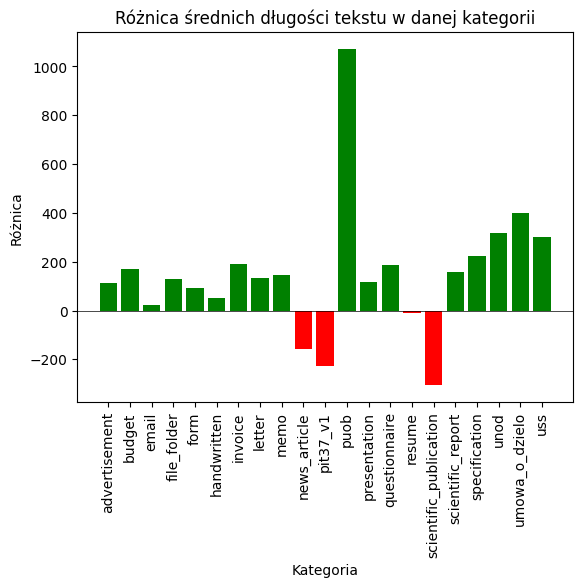

In [57]:
import matplotlib.pyplot as plt

labels = ['advertisement',
 'budget',
 'email',
 'file_folder',
 'form',
 'handwritten',
 'invoice',
 'letter',
 'memo',
 'news_article',
 'pit37_v1',
 'puob',
 'presentation',
 'questionnaire',
 'resume',
 'scientific_publication',
 'scientific_report',
 'specification',
 'unod',
 'umowa_o_dzielo',
 'uss']

# Set the colors based on the values' positions
colors = ['green' if val >= 0 else 'red' for val in diff]

positions = range(len(labels))

# Create the bar plot
plt.bar(labels, diff, color=colors)

plt.xticks(positions, labels, rotation='vertical')

# Add a horizontal line at y=0
plt.axhline(0, color='black', linewidth=0.5)

# Add labels and title
plt.xlabel('Kategoria')
plt.ylabel('Różnica')
plt.title('Różnica średnich długości tekstu w danej kategorii')

# Display the plot
plt.show()

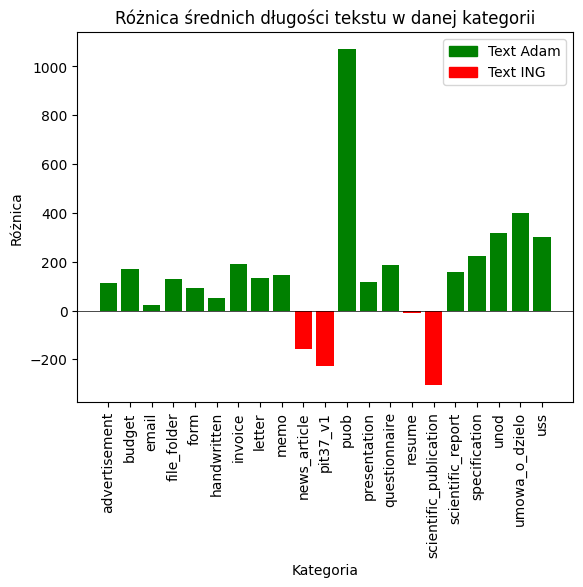

In [58]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

labels = ['advertisement', 'budget', 'email', 'file_folder', 'form', 'handwritten', 'invoice', 'letter', 'memo',
          'news_article', 'pit37_v1', 'puob', 'presentation', 'questionnaire', 'resume', 'scientific_publication',
          'scientific_report', 'specification', 'unod', 'umowa_o_dzielo', 'uss']

# Set the colors based on the values' positions
colors = ['green' if val >= 0 else 'red' for val in diff]

positions = range(len(labels))

# Create the bar plot
plt.bar(labels, diff, color=colors)

plt.xticks(positions, labels, rotation='vertical')

# Add a horizontal line at y=0
plt.axhline(0, color='black', linewidth=0.5)

# Create custom legend labels
legend_labels = [mpatches.Patch(color='green', label='Text Adam'),
                 mpatches.Patch(color='red', label='Text ING')]

# Add legend
plt.legend(handles=legend_labels)

# Add labels and title
plt.xlabel('Kategoria')
plt.ylabel('Różnica')
plt.title('Różnica średnich długości tekstu w danej kategorii')

# Display the plot
plt.show()


In [37]:
df2


,File,Text ING,ID,Text Adam,Nrow,Text Adam pl,isPolish,isEnglish,isOther
0,9d6f61c6-52ad-4546-85b7-b6a0a30a21d5,"POLA Lalwe poda PODATNIK POLA , CIEMNE _ URZAD...",10,"(V PiTax.pl POLA JASNE V/YPEŁKIA PODATNIK, POŁ...",48,"(V PiTax.pl POLA JASNE V/YPELKIA PODATNIK, POL...",1,0,0
1,f14ea197-70bd-45ae-9a22-d243f37f6c26,PlTaxpl POUA 'WYPELNIA PODATNIK POLA CIEMNE WY...,10,POJETEJ EPEE W O W W) PiTaypl POLA JASNE WYPEL...,47,POJETEJ EPEE W O W W) PiTaypl POLA JASNE WYPEL...,1,0,0
2,070a521a-7038-4551-bc6a-bbb6f96e1505,MyPfenl Wypelnic DulyMi DaukowanlUiTERAM ClRnY...,10,p PITaxpl so snewrrttna robamik Po CIEMNE WYPE...,38,p PITaxpl so snewrrttna robamik Po CIEMNE WYPE...,1,0,0
3,f4d15b30-6e96-4452-b614-a986065d6a80,PlTaxpl POLA JASNE WYPEŁNIA PODATNIK _POLA CIE...,10,+ (Gy PITax.pl. żpou yeżwe wypctnia robwrać po...,55,+ (Gy PITax.pl. zpou yezwe wypctnia robwrac po...,1,0,0
4,64d085a8-39a0-4887-859e-811a3de9879b,PITaxpl LA Jash€ WyPelNIA PODiTŃIK PCU CieMne ...,10,"(GF PITaż pi. ojej wod ok ny aaa ya zickądka,„...",48,"(GF PITaz pi. ojej wod ok ny aaa ya zickadka,„...",1,0,0
...,...,...,...,...,...,...,...,...,...
10844,8a1bb716-156c-4eca-a8cd-f726a5cf7032,"MSDS 002z4 Ello ~arte-Vewaa @WEre Hkc hm2 ""7c0...",17,4 3 san ky SA MSDS ję oazz% Ą 27 = datdasegonn...,33,4 3 san ky SA MSDS je oazz% A 27 = datdasegonn...,0,1,0
10845,e42169d6-f1c4-416a-a7eb-4fc90fd3c086,"June 1992 40 03-540 Appearance: Colorless, cle...",17,4 June 1992 AR-304 03-540 - Appearance: Colori...,32,4 June 1992 AR-304 03-540 - Appearance: Colori...,0,1,0
10846,9807fe93-30d5-422b-8844-fd16529c8e7d,PULL MAILFILE REQUEST TO: Bagby RJR-10301 July...,4,"a, RtR=+R+>,> zn © PULL MAILFILE REQUEST TO: J...",26,"a, RtR=+R+>,> zn © PULL MAILFILE REQUEST TO: J...",0,1,0
10847,e7eac2d5-364d-4f82-bb9d-354f11159a51,~Tclecen 8/23/38 SAJ Co z & RH cam bt meaured ...,5,"j TTelecn 4/a3/88 Mopsy JAJ CO, ÓC RA cam ta ...",17,"j TTelecn 4/a3/88 Mopsy JAJ CO, OC RA cam ta ...",0,1,0


In [35]:
df2.head()

,File,Text ING,ID,Text Adam,Nrow,Text Adam pl,isPolish,isEnglish,isOther
0,9d6f61c6-52ad-4546-85b7-b6a0a30a21d5,"POLA Lalwe poda PODATNIK POLA , CIEMNE _ URZAD...",10,"(V PiTax.pl POLA JASNE V/YPEŁKIA PODATNIK, POŁ...",48,"(V PiTax.pl POLA JASNE V/YPELKIA PODATNIK, POL...",1,0,0
1,f14ea197-70bd-45ae-9a22-d243f37f6c26,PlTaxpl POUA 'WYPELNIA PODATNIK POLA CIEMNE WY...,10,POJETEJ EPEE W O W W) PiTaypl POLA JASNE WYPEL...,47,POJETEJ EPEE W O W W) PiTaypl POLA JASNE WYPEL...,1,0,0
2,070a521a-7038-4551-bc6a-bbb6f96e1505,MyPfenl Wypelnic DulyMi DaukowanlUiTERAM ClRnY...,10,p PITaxpl so snewrrttna robamik Po CIEMNE WYPE...,38,p PITaxpl so snewrrttna robamik Po CIEMNE WYPE...,1,0,0
3,f4d15b30-6e96-4452-b614-a986065d6a80,PlTaxpl POLA JASNE WYPEŁNIA PODATNIK _POLA CIE...,10,+ (Gy PITax.pl. żpou yeżwe wypctnia robwrać po...,55,+ (Gy PITax.pl. zpou yezwe wypctnia robwrac po...,1,0,0
4,64d085a8-39a0-4887-859e-811a3de9879b,PITaxpl LA Jash€ WyPelNIA PODiTŃIK PCU CieMne ...,10,"(GF PITaż pi. ojej wod ok ny aaa ya zickądka,„...",48,"(GF PITaz pi. ojej wod ok ny aaa ya zickadka,„...",1,0,0
